# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data: Wholesale customers data
from ucimlrepo import fetch_ucirepo 
wholesale_customers = fetch_ucirepo(id=292) 
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 

#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [3]:
# Your code here:
X.info

<bound method DataFrame.info of      Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0          2  12669   9656     7561     214              2674        1338
1          2   7057   9810     9568    1762              3293        1776
2          2   6353   8808     7684    2405              3516        7844
3          1  13265   1196     4221    6404               507        1788
4          2  22615   5410     7198    3915              1777        5185
..       ...    ...    ...      ...     ...               ...         ...
435        1  29703  12051    16027   13135               182        2204
436        1  39228   1431      764    4510                93        2346
437        2  14531  15488    30243     437             14841        1867
438        1  10290   1981     2232    1038               168        2125
439        1   2787   1698     2510      65               477          52

[440 rows x 7 columns]>

In [5]:
# Your code here:
y.info

<bound method DataFrame.info of      Region
0         3
1         3
2         3
3         3
4         3
..      ...
435       3
436       3
437       3
438       3
439       3

[440 rows x 1 columns]>

# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [6]:
# Verificar si hay valores nulos en los datos
null_values = X.isnull().sum()

# Describir las estadísticas básicas de los datos
statistics = X.describe()

# Mostrar los resultados
null_values, statistics

(Channel             0
 Fresh               0
 Milk                0
 Grocery             0
 Frozen              0
 Detergents_Paper    0
 Delicassen          0
 dtype: int64,
           Channel          Fresh          Milk       Grocery        Frozen  \
 count  440.000000     440.000000    440.000000    440.000000    440.000000   
 mean     1.322727   12000.297727   5796.265909   7951.277273   3071.931818   
 std      0.468052   12647.328865   7380.377175   9503.162829   4854.673333   
 min      1.000000       3.000000     55.000000      3.000000     25.000000   
 25%      1.000000    3127.750000   1533.000000   2153.000000    742.250000   
 50%      1.000000    8504.000000   3627.000000   4755.500000   1526.000000   
 75%      2.000000   16933.750000   7190.250000  10655.750000   3554.250000   
 max      2.000000  112151.000000  73498.000000  92780.000000  60869.000000   
 
        Detergents_Paper    Delicassen  
 count        440.000000    440.000000  
 mean        2881.493182   15

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [7]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

# Escalar los datos
scaler = StandardScaler()
customers_scale = scaler.fit_transform(X)

# Convertir los datos escalados a un DataFrame para una mejor visualización
customers_scale_df = pd.DataFrame(customers_scale, columns=X.columns)

# Mostrar las primeras filas de los datos escalados
customers_scale_df.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [8]:
from sklearn.cluster import KMeans

# Iniciar el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(customers_scale_df)

# Asignar las etiquetas de los clusters a los datos originales
X['labels'] = kmeans.labels_

# Mostrar las primeras filas de los datos con las etiquetas de los clusters
X.head()


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,12669,9656,7561,214,2674,1338,0
1,2,7057,9810,9568,1762,3293,1776,0
2,2,6353,8808,7684,2405,3516,7844,0
3,1,13265,1196,4221,6404,507,1788,1
4,2,22615,5410,7198,3915,1777,5185,0


### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [9]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

Cuenta los valores en `labels`.

In [11]:
# Contar los valores en la columna 'labels'
label_counts = X['labels'].value_counts()

# Mostrar los resultados
label_counts


labels
1    297
0    130
2     13
Name: count, dtype: int64

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [12]:
from sklearn.cluster import DBSCAN 

# Your code here
# Iniciar el modelo DBSCAN
dbscan = DBSCAN(eps=0.5)

# Ajustar el modelo a los datos escalados
dbscan.fit(customers_scale_df)

# Asignar las etiquetas de los clusters de DBSCAN a los datos originales
X['labels_DBSCAN'] = dbscan.labels_

# Mostrar las primeras filas de los datos con las etiquetas de los clusters de K-Means y DBSCAN
X.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,12669,9656,7561,214,2674,1338,0,3
1,2,7057,9810,9568,1762,3293,1776,0,-1
2,2,6353,8808,7684,2405,3516,7844,0,-1
3,1,13265,1196,4221,6404,507,1788,1,1
4,2,22615,5410,7198,3915,1777,5185,0,-1


Cuenta los valores en `labels_DBSCAN`.

In [13]:
# Your code here
# Contar los valores en la columna 'labels_DBSCAN'
label_dbscan_counts = X['labels_DBSCAN'].value_counts()

# Mostrar los resultados
label_dbscan_counts


labels_DBSCAN
 1    201
-1    194
 0     32
 3      8
 2      5
Name: count, dtype: int64

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [15]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

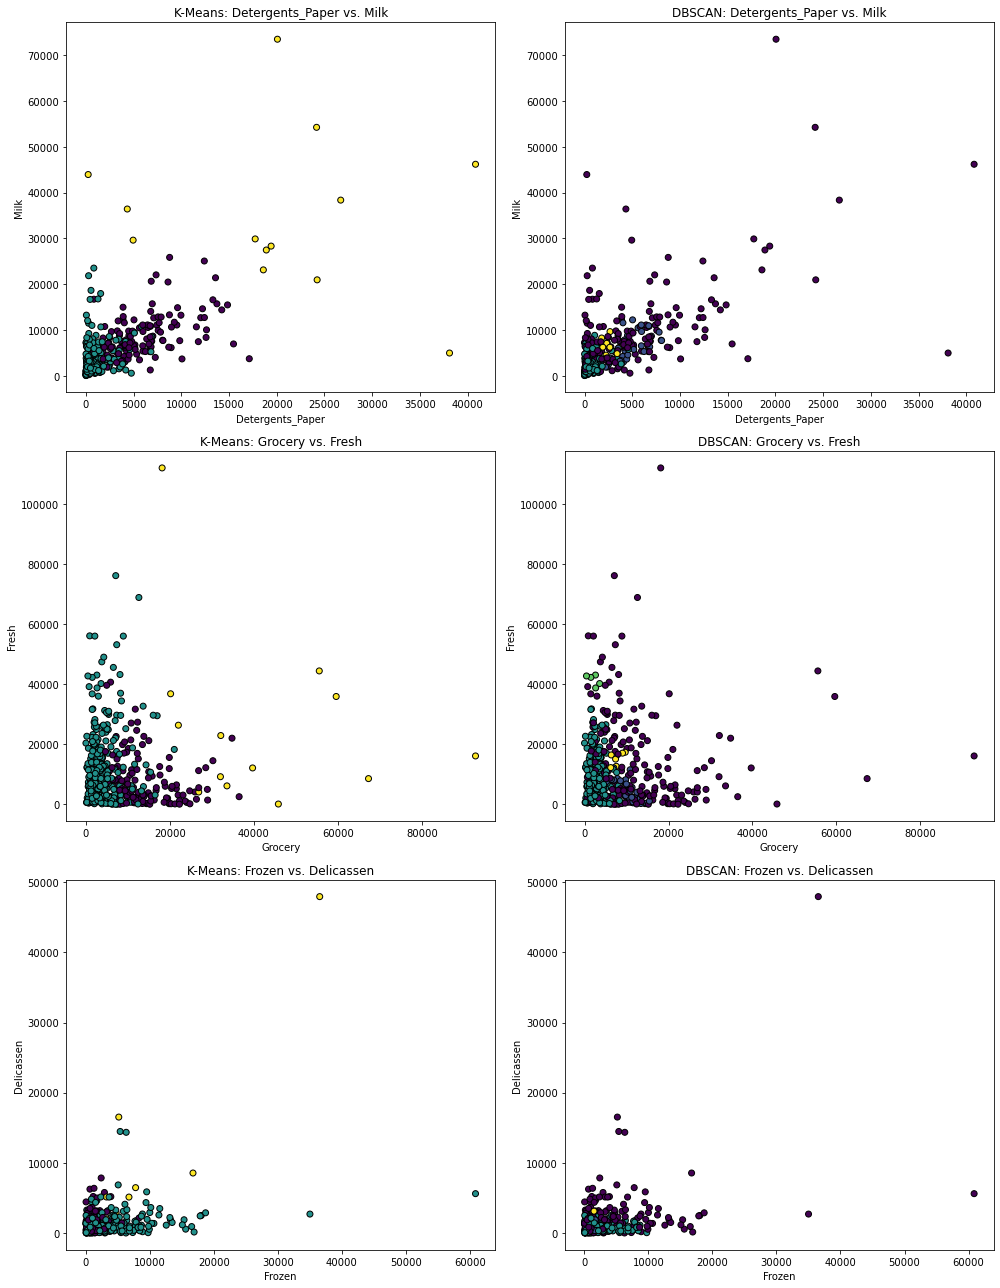

In [14]:
# Crear gráficos de dispersión para comparar K-Means y DBSCAN
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Gráfico 1: Detergents_Paper vs. Milk (K-Means)
axes[0, 0].scatter(X['Detergents_Paper'], X['Milk'], c=X['labels'], cmap='viridis', marker='o', edgecolor='k')
axes[0, 0].set_title('K-Means: Detergents_Paper vs. Milk')
axes[0, 0].set_xlabel('Detergents_Paper')
axes[0, 0].set_ylabel('Milk')

# Gráfico 2: Detergents_Paper vs. Milk (DBSCAN)
axes[0, 1].scatter(X['Detergents_Paper'], X['Milk'], c=X['labels_DBSCAN'], cmap='viridis', marker='o', edgecolor='k')
axes[0, 1].set_title('DBSCAN: Detergents_Paper vs. Milk')
axes[0, 1].set_xlabel('Detergents_Paper')
axes[0, 1].set_ylabel('Milk')

# Gráfico 3: Grocery vs. Fresh (K-Means)
axes[1, 0].scatter(X['Grocery'], X['Fresh'], c=X['labels'], cmap='viridis', marker='o', edgecolor='k')
axes[1, 0].set_title('K-Means: Grocery vs. Fresh')
axes[1, 0].set_xlabel('Grocery')
axes[1, 0].set_ylabel('Fresh')

# Gráfico 4: Grocery vs. Fresh (DBSCAN)
axes[1, 1].scatter(X['Grocery'], X['Fresh'], c=X['labels_DBSCAN'], cmap='viridis', marker='o', edgecolor='k')
axes[1, 1].set_title('DBSCAN: Grocery vs. Fresh')
axes[1, 1].set_xlabel('Grocery')
axes[1, 1].set_ylabel('Fresh')

# Gráfico 5: Frozen vs. Delicassen (K-Means)
axes[2, 0].scatter(X['Frozen'], X['Delicassen'], c=X['labels'], cmap='viridis', marker='o', edgecolor='k')
axes[2, 0].set_title('K-Means: Frozen vs. Delicassen')
axes[2, 0].set_xlabel('Frozen')
axes[2, 0].set_ylabel('Delicassen')

# Gráfico 6: Frozen vs. Delicassen (DBSCAN)
axes[2, 1].scatter(X['Frozen'], X['Delicassen'], c=X['labels_DBSCAN'], cmap='viridis', marker='o', edgecolor='k')
axes[2, 1].set_title('DBSCAN: Frozen vs. Delicassen')
axes[2, 1].set_xlabel('Frozen')
axes[2, 1].set_ylabel('Delicassen')

# Ajustar el layout
plt.tight_layout()
plt.show()

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

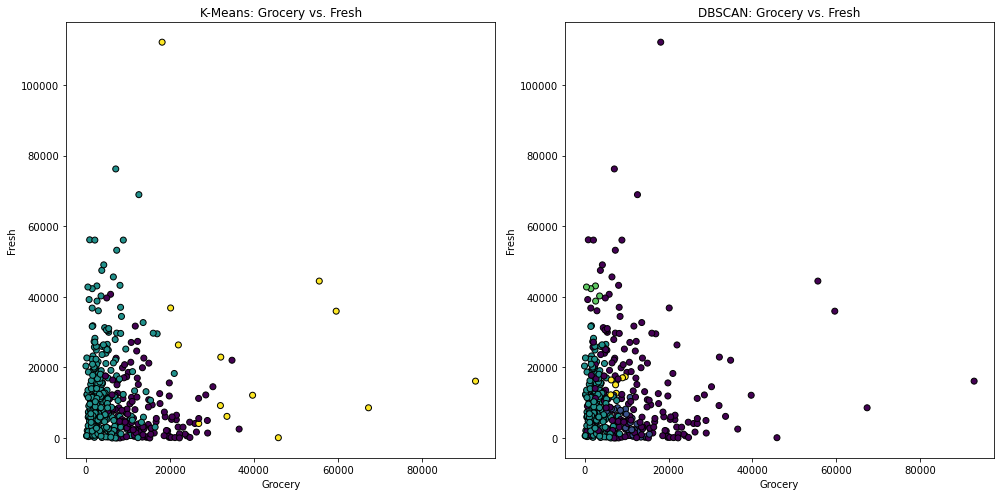

In [16]:
# Your code here:
# Crear un gráfico de dispersión para comparar Grocery vs. Fresh usando labels y labels_DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico 1: Grocery vs. Fresh (K-Means)
axes[0].scatter(X['Grocery'], X['Fresh'], c=X['labels'], cmap='viridis', marker='o', edgecolor='k')
axes[0].set_title('K-Means: Grocery vs. Fresh')
axes[0].set_xlabel('Grocery')
axes[0].set_ylabel('Fresh')

# Gráfico 2: Grocery vs. Fresh (DBSCAN)
axes[1].scatter(X['Grocery'], X['Fresh'], c=X['labels_DBSCAN'], cmap='viridis', marker='o', edgecolor='k')
axes[1].set_title('DBSCAN: Grocery vs. Fresh')
axes[1].set_xlabel('Grocery')
axes[1].set_ylabel('Fresh')

# Ajustar el layout
plt.tight_layout()
plt.show()


Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

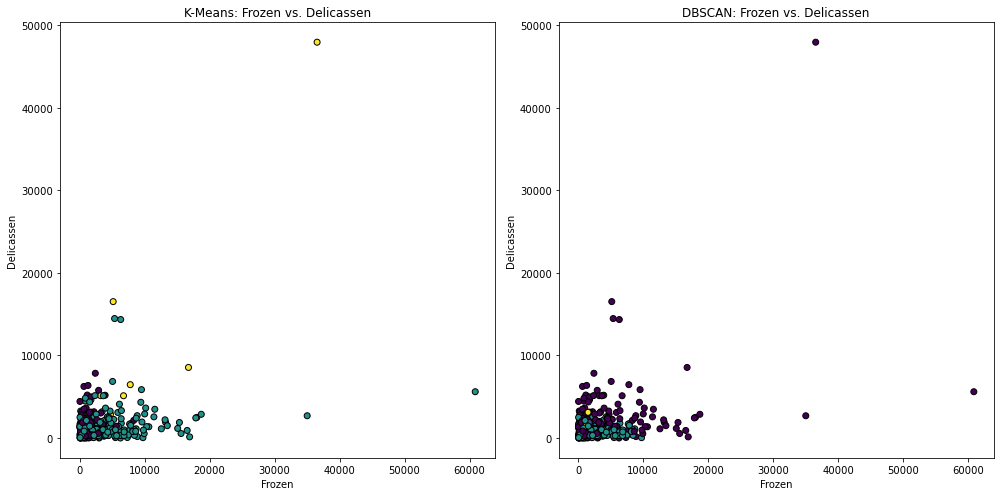

In [17]:
# Your code here:
# Crear un gráfico de dispersión para comparar Frozen vs. Delicassen usando labels y labels_DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico 1: Frozen vs. Delicassen (K-Means)
axes[0].scatter(X['Frozen'], X['Delicassen'], c=X['labels'], cmap='viridis', marker='o', edgecolor='k')
axes[0].set_title('K-Means: Frozen vs. Delicassen')
axes[0].set_xlabel('Frozen')
axes[0].set_ylabel('Delicassen')

# Gráfico 2: Frozen vs. Delicassen (DBSCAN)
axes[1].scatter(X['Frozen'], X['Delicassen'], c=X['labels_DBSCAN'], cmap='viridis', marker='o', edgecolor='k')
axes[1].set_title('DBSCAN: Frozen vs. Delicassen')
axes[1].set_xlabel('Frozen')
axes[1].set_ylabel('Delicassen')

# Ajustar el layout
plt.tight_layout()
plt.show()


Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [19]:
# Your code here:
# Calcular la media de todas las columnas agrupadas por labels (K-Means)
mean_kmeans = X.groupby('labels').mean()

# Calcular la media de todas las columnas agrupadas por labels_DBSCAN
mean_dbscan = X.groupby('labels_DBSCAN').mean()

import ace_tools as tools; tools.display_dataframe_to_user(name="K-Means Clustering Group Means", dataframe=mean_kmeans)
tools.display_dataframe_to_user(name="DBSCAN Clustering Group Means", dataframe=mean_dbscan)

# Mostrar los resultados
mean_kmeans, mean_dbscan


ModuleNotFoundError: No module named 'ace_tools'

¿Qué algoritmo funciona mejor?
Parece que a la hora de generar cluster funciona mejor KMeans

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
